In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df_op_elo.groupby(level=0).sum()

In [109]:
PATH = "openingsFile.txt"
dataset = pd.read_csv(PATH, sep='|')
dataset['avgScore'] = dataset.score / dataset['count']
dataset.head()

,opening,eco,tempo,avgEloClass,ratingDiff,score,count,sumBlackElo,sumWhiteElo,avgScore
0,Richter-Veresov Attack,D01,Bullet,1800-1999,White=Black,95.5,168.0,320055.0,320149.0,0.568452
1,"Sicilian Defense: Closed Variation, Grob Attack",B23,Blitz,2200-2399,Black+200,0.0,2.0,4214.0,4436.0,0.000000
2,"King's Gambit Accepted, Salvio Gambit",C37,???,1600-1799,Black+400,0.5,5.0,7522.0,7917.0,0.100000
3,Ruy Lopez: Nuernberg Variation,C60,Classical,1400-1599,Black+500+,0.0,1.0,1178.0,1709.0,0.000000
4,"Sicilian Defense: Najdorf Variation, English A...",B90,Bullet,1400-1599,Black+200,17.5,51.0,72629.0,72732.0,0.343137


## Openings distribution

In [52]:
opening_count = dataset[dataset.opening != '???'].opening.value_counts()
opening_count = opening_count[opening_count >= 400]

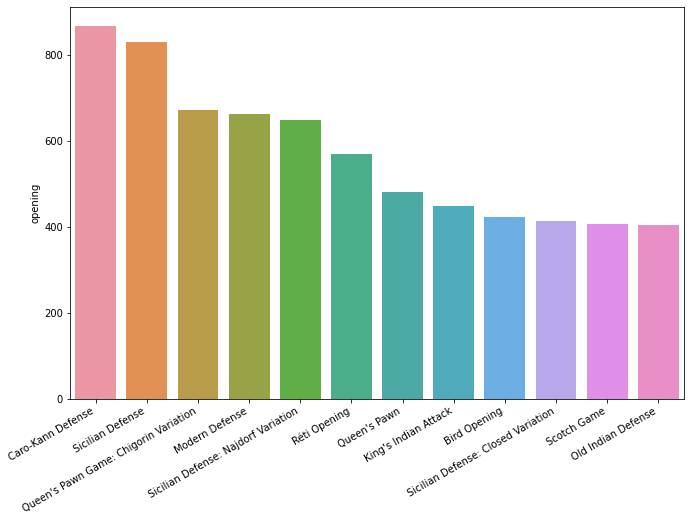

In [64]:
fig, ax = plt.subplots(figsize=(11, 8))
g = sns.barplot(x=opening_count.index, y=opening_count, ax=ax)
fig.autofmt_xdate()

## Openings distribution per elo class

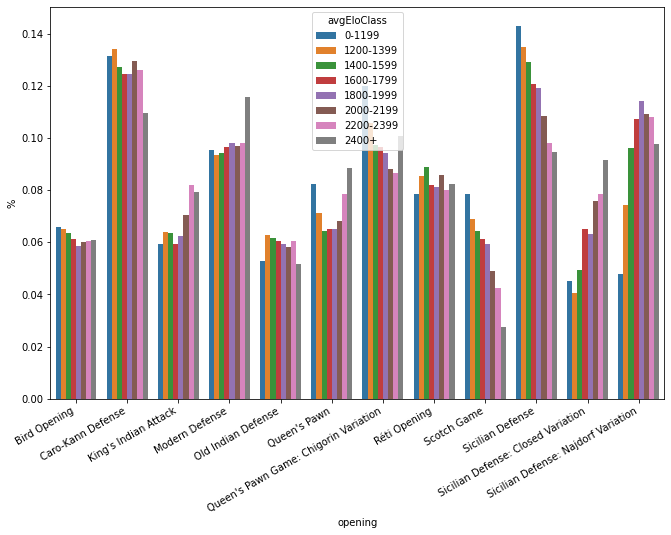

In [100]:
df_op_elo = dataset[dataset.opening.isin(opening_count.index)].groupby(['avgEloClass', 'opening'], as_index=True).size()
df_op_elo = (df_op_elo / df_op_elo.groupby(level=0).sum()).reset_index()
df_op_elo.rename(columns={0: '%'}, inplace=True)
fig, ax = plt.subplots(figsize=(11, 8))
g = sns.barplot(data=df_op_elo, x='opening', y='%', 
                hue='avgEloClass', ax=ax)
fig.autofmt_xdate()

From this, Sicilian defense seems pretty highly popular at pretty much all the elos, even for beginner. However, we can see that more high players like Modern Defense than that average player

## Rating Difference performance in term of results

Let's see if the rating differential has an impact on the result of the game

In [110]:
df_diff_perf = dataset.groupby('ratingDiff', as_index=False)['avgScore'].mean()

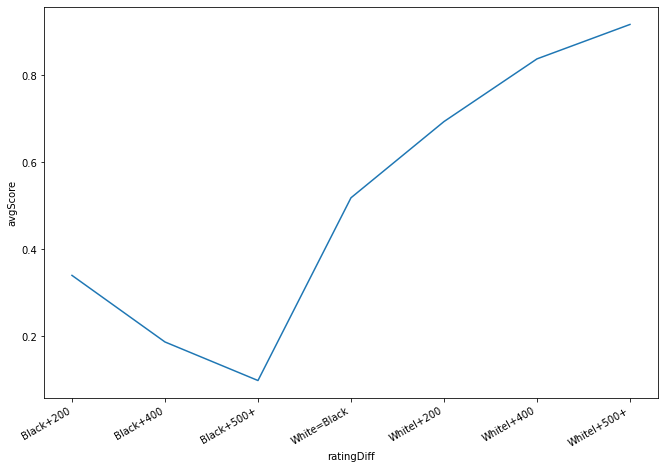

In [113]:
fig, ax = plt.subplots(figsize=(11, 8))
g = sns.lineplot(data=df_diff_perf, x='ratingDiff', y='avgScore', ax=ax)
fig.autofmt_xdate()

There is a clear difference as we can see, when white are higher elo they clearly most of the games. So we can say that the elo system is a good measure of how good someone is.

Now let's look at this distribution for each avgEloClass

In [114]:
df_diff_perf_elo = dataset.groupby(['ratingDiff', 'avgEloClass'], as_index=False)['avgScore'].mean()

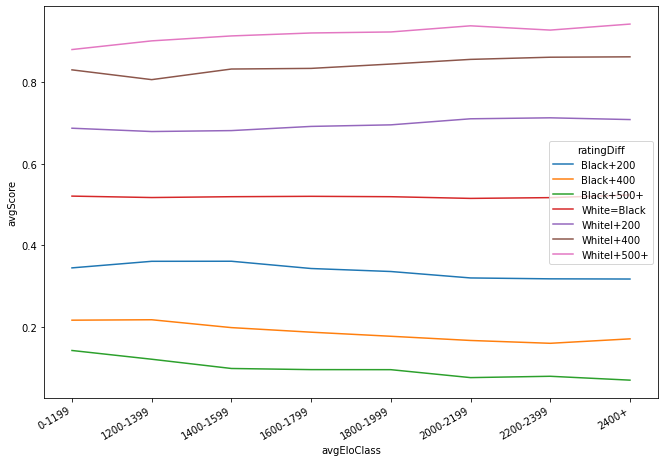

In [120]:
fig, ax = plt.subplots(figsize=(11, 8))
g = sns.lineplot(data=df_diff_perf_elo, x='avgEloClass', y='avgScore', hue='ratingDiff', ax=ax)
fig.autofmt_xdate()

The Elo class doesn't seem to impact the distribution of winning for each rating diff. 1400 vs 1200 scores just as well as 2200 vs 2000,

## Sicilian defense and its variations

Let's look at how Sicilian Defense performances compared to its variation

In [154]:
sicilian_df = dataset[(dataset.opening.str.contains('Sicilian')) & (dataset.tempo == 'Blitz')]
sic_val = sicilian_df.opening.value_counts()
sic_val = sic_val[sic_val > 100]
sicilian_df = sicilian_df[sicilian_df.opening.isin(sic_val.index)]

In [155]:
sic_diff_perf_elo = sicilian_df.groupby(['opening', 'avgEloClass'], as_index=False)['avgScore'].mean()

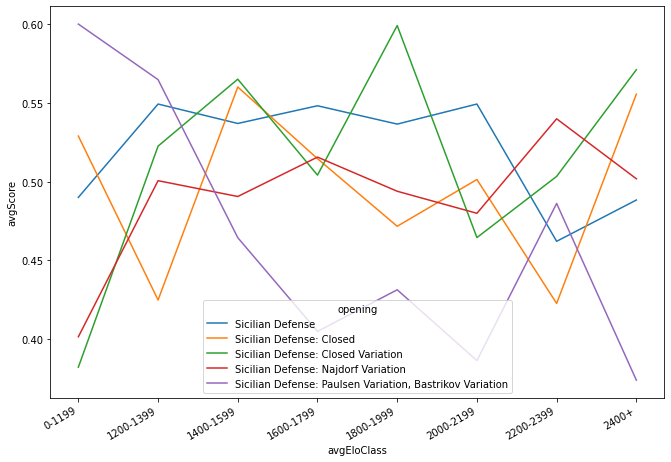

In [156]:
fig, ax = plt.subplots(figsize=(11, 8))
g = sns.lineplot(data=sic_diff_perf_elo, x='avgEloClass', y='avgScore', hue='opening', ax=ax)
fig.autofmt_xdate()

The variations don't show any clear pattern in terms of winning for the Sicilian Defense in a Blitz environment. However, the Closed Variation looks really good fro average players at 1800 elo, and the Vanilla Sicilian Defense seems good overall.